In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

In [2]:
# tensorflow와 tf.keras 임포트
import tensorflow as tf
from tensorflow import keras

In [3]:
# helper 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)

1.15.0


# 패션 MNIST 데이터셋 임포트

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
# train_images, train_labels: 훈련 세트
# test_images, test_labels: 테스트 세트
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [7]:
# 이미지: 28X28 크기, 넘파이 배열
# 픽셀값: 0~255
# 레이블: 0~9 정수 배열, 옷의 클래스를 나타냄

# 각 이미지는 하나의 레이블에 매핑

# 데이터셋에 클래스 이름 없음

# 이미지 출력시 사용을 위해 별도의 변수 만들어 저장
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 데이터 탐색

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [12]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
len(test_labels)

10000

# 데이터 전처리

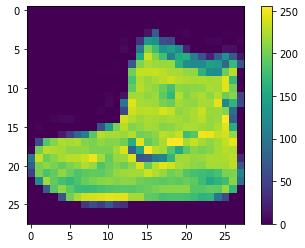

In [15]:
# 픽셀 값 범위: 0~255
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
# 신경망 모델에 주입하기 전, 픽셀 값 범위 0~1로 조정

train_images = train_images / 255.0
test_images = test_images / 255.0

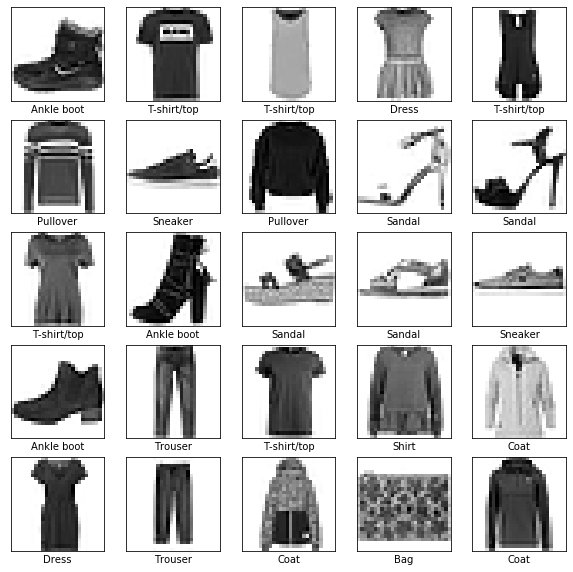

In [23]:
# train 세트의 처음 25개 이미지와 클래스 이름 출력

plt.figure(figsize=(10, 10))
for i in range(25):
    # 5행, 5열 i+1번째 위치
    plt.subplot(5, 5, i+1)   
    
    # 틱이 위치하는 위치의 리스트, 빈 리스트 입력시 각 축의 틱 사용 X
    plt.xticks([])
    plt.yticks([])
    
    # 격자 표시 여부
    plt.grid(False) 
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    
    # ticks에서 설정한 위치에 표시할 라벨 
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 모델 구성

## 층 설정

- 층(layer): 신경망의 기본 구성요소
    - 주입된 데이터에서 표현을 추출
- 대부분 딥러닝은 간단한 층을 연결하여 구성
    - `tf.keras.layers.Dense`와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습된다.

In [25]:
model = keras.Sequential([
    # 2차원 배열(28X28픽셀) 이미지 포맷을 1차원 배열로 변환
    # 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘린다.
    # 학습되는 가중치 없음, 데이터를 변환하기만
    keras.layers.Flatten(input_shape=(28, 28)),
    
    # 픽셀을 펼친 후 두 개의 Dense층이 연속되어 연결
    # 첫번째 층은 128개 노드(뉴런)
    # 두번째 층은 10개 노드, 소프트맥스 층, 10개의 확률 반환, 전체 합=1
    # 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률 출력
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## 모델 컴파일

- 모델 훈련 전 필요한 설정 추가
    - 손실 함수: 훈련 중 모델의 오차 측정, 함수 최소화 필요
    - 옵티마이저: 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법 결정
    - 지표(metrics): 훈련 단계와 테스트 단계를 모니터링

In [26]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# 모델 훈련

1. 훈련 데이터를 모델에 주입
2. 모델이 이미지와 레이블 매핑 방법을 학습
3. 테스트 세트에 대한 모델의 예측 생성

In [28]:
# 훈련 시작
# epochs: 학습 횟수
model.fit(train_images, train_labels, epochs = 5)
# 손실과 정확도 지표 출력

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 149us/sample - loss: 0.4992 - acc: 0.8229
Epoch 2/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3732 - acc: 0.8654
Epoch 3/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3338 - acc: 0.8775
Epoch 4/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3097 - acc: 0.8863
Epoch 5/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2935 - acc: 0.8915


# 정확도 평가

- 테스트 세트에서 모델의 성능 비교

In [29]:
# verbose: 각 학습단계마다 training progress를 어떻게 보여줄지 결정
# verbose=0: show nothing
# verbose=1: show an animated progress bar ex) [=======]
# verbose=2: 전체 n회차 중 몇 번째인지 표시 ex) Epoch1/10
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

10000/10000 - 1s - loss: 0.3613 - acc: 0.8696


```
★ 테스트 세트의 정확도가 훈련 세트 정확도 보다 낮다. -> 과대적합
★ 훈련 데이터보다 새로운 데이터에서 성능이 낮아짐
```

# 예측 만들기

In [30]:
# 훈련된 모델을 사용하여 이미지에 대한 예측 만들기
# 테스트 세트에 있는 각 이미지의 레이블 예측
predictions = model.predict(test_images)

In [31]:
# 첫번째 예측 - 10개의 숫자 배열
# 10개의 옷 품목에 상응하는 모델의 신뢰도
predictions[0]

array([4.0634309e-06, 3.2637477e-08, 2.8618052e-07, 4.4022497e-09,
       7.2705664e-09, 5.9045805e-03, 1.4089738e-06, 2.8293908e-02,
       6.0660500e-07, 9.6579504e-01], dtype=float32)

In [32]:
# 가장 높은 신뢰도를 가진 레이블
np.argmax(predictions[0])    # 9: 앵클부츠

9

In [33]:
# 10개 클래스에 대한 예측 그래프로 표현
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    # cmap: 컬러로 카테고리 표현
    # cm.binary: 흑백컬러
    plt.imshow(img, cmap=plt.cm.binary)    
    predicted_label = np.argmax(predictions_array)   # 가장 높은 값
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')    # 잘못된 예측
    thisplot[true_label].set_color('blue')        # 올바른 예측                               

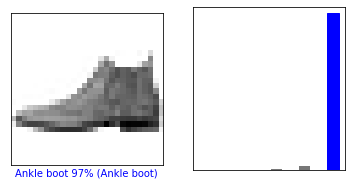

In [34]:
# 0번째 원소의 이밎, 예측, 신뢰점수 배열 확인
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

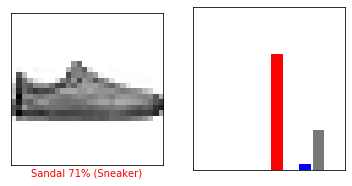

In [35]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

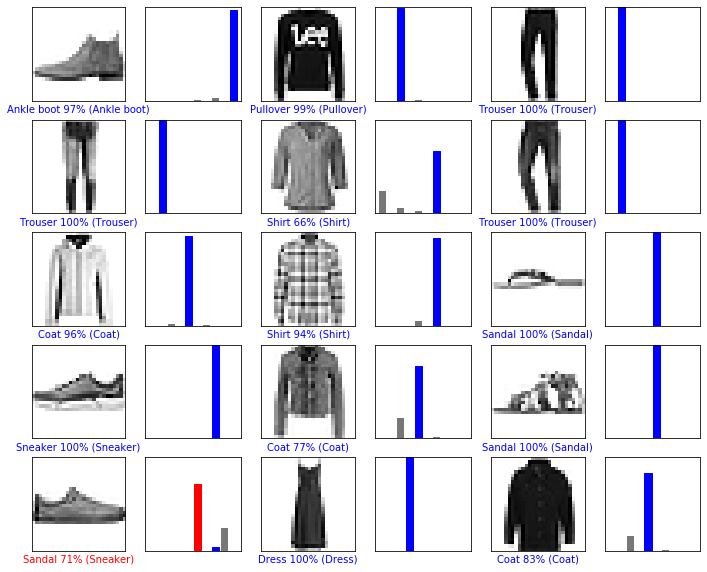

In [36]:
# 처음 X개의 테스트 이미지와 예측 레이블, 진짜 레이블 출력

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [48]:
# 훈련된 모델을 사용하여 만든 이미지에 대한 예측

# 테스트 세트에서 이미지 하나 선택
img = test_images[3]

print(img.shape)

(28, 28)


In [49]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [50]:
# 이미지의 예측 만들기
# model.predict는 2차원 넘파이 배열을 반환
predictions_single = model.predict(img)

print(predictions_single)

[[3.1083503e-06 9.9997425e-01 7.4320731e-08 2.2090084e-05 3.5876573e-07
  1.3832040e-08 1.4705040e-07 1.1590659e-15 5.3506966e-10 7.8473512e-11]]


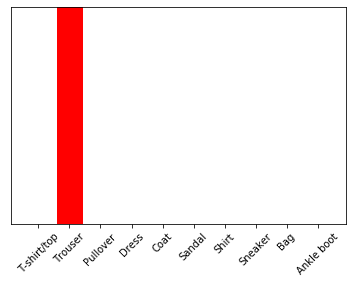

In [55]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)

In [57]:
np.argmax(predictions_single[0])

1